# Лабораторная работа 1. Обучение без учителя

## Часть 1. Кластеризация

В данной лабораторной работе мы поэкспериментируем с кластеризацией набора данных digits с помощью алгоритма k-means. Сперва загрузим изображения цифр и перемешаем в случайном порядке.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import random

digits = load_digits()
x_digits = digits.data
y_digits = digits.target
data = np.c_[x_digits, y_digits]
np.random.shuffle(data)
x_digits = data[:, :x_digits.shape[1]]
y_digits = data[:, x_digits.shape[1]].astype(int)

При использовании алгоритма k-means параметр n_clusters (число кластеров) является настраиваемым параметром. Для того, чтобы посмотреть как меняется качество кластеризации при изменении числа кластеров, обучим алгоритм для различного числа кластеров от 2 до 50. Для оценки качества классификации используем различные метрики. Более подробно о них ниже.

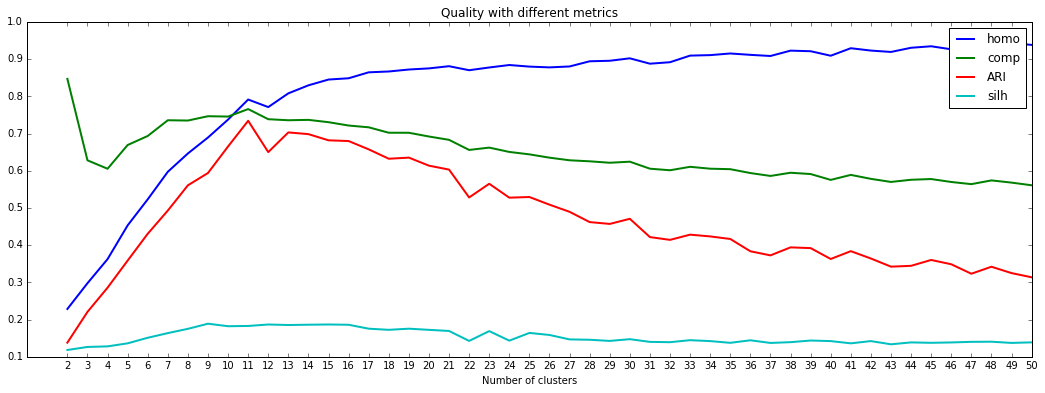

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from sklearn import metrics

homo, comp, ARI, silh = [], [], [], []
cluster_numbers = np.arange(2, 51, 1)
for value in cluster_numbers:
    clf = KMeans(n_clusters = value)
    clf.fit(x_digits)
    homo.append(metrics.homogeneity_score(y_digits, clf.labels_))
    comp.append(metrics.completeness_score(y_digits, clf.labels_))
    ARI.append(metrics.adjusted_rand_score(y_digits, clf.labels_))
    silh.append(metrics.silhouette_score(x_digits, clf.labels_, metric='euclidean'))

plt.figure(figsize = (18, 6))
plt.title("Quality with different metrics")
plt.plot(cluster_numbers, homo, linewidth = 2.0)
plt.plot(cluster_numbers, comp, linewidth = 2.0)
plt.plot(cluster_numbers, ARI, linewidth = 2.0)
plt.plot(cluster_numbers, silh, linewidth = 2.0)
plt.legend(['homo', 'comp', 'ARI', 'silh'])
plt.xlabel("Number of clusters")
plt.xticks(cluster_numbers)
plt.show()

Объясним полученные результаты.  
* Метрика homogeneity_score характеризует однородность получившихся кластеров. Чем больше объектов с различными истинными метками классов находятся в одном классе, тем ниже метрика. Логично, что с увеличением числа кластеров она растет. Предельный случай: значение 1.0 при n_clusters = n_digits.
* Метрика completeness_score похожа на homogeneity_score, но имеет иной смысл. В этом случае рассматриваются объекты с одинаковыми истинными метками. После кластеризации чем больше их принадлежат к одному кластеру, тем выше метрика. При очень большом числе кластеров эта метрика становится все меньше.  
* Метрика ARI показывает похожесть истинных и предсказанных меток (без учета перестановок, только доли объектов различных кластеров). Эта метрика в общем случае имеет максимум, так как при малом числе кластеров эти кластеры чересчур большие, а при большом - чересчур раздроблены.  
* Метрика silhouette_score вообще игнорирует истинные метки. Она показывает "различимость" полученных кластеров. У этой метрики также в общем случае есть максимум, так при слишком малом или слишком большом числе кластеров они будут трудно отделимыми друг от друга.  

Полученные графики показывают, чо оптимальное число кластеров - 11, так как при этом значении две метрики принимают наибольшее значение (не считаем completeness_score при n_clusters = 2). Возможно это объясняется тем, что, как будет показано ниже, некоторые цифры от 0 до 9 перемешиваются между собой (например, 5 и 8). Тем не менее, при n_clusters = 10 значения метрик также высокие, поэтому в дальнейшем будем рассматривать именно такое число кластеров.

Теперь поэкспериментируем с различными начальными приближениями. Согласно документации, параметр init может принимать значения 'k-means++' (default) и random.

In [3]:
def estimate_kmeans(clf, x_train, y_train, title = None):
    print title
    clf.fit(x_train)
    homo = metrics.homogeneity_score(y_train, clf.labels_)
    comp = metrics.completeness_score(y_train, clf.labels_)
    ARI = metrics.adjusted_rand_score(y_train, clf.labels_)
    silh = metrics.silhouette_score(x_train, clf.labels_, metric='euclidean')
    print "Homogeneity score: " + str(homo)
    print "Completeness score: " + str(comp)
    print "Adjusted Rand index: " + str(ARI)
    print "Silhouette Coefficient: " + str(silh) + '\n'
    
estimate_kmeans(KMeans(n_clusters = 2, init = 'k-means++'), x_digits, y_digits, 'n_clusters: 2, init: k-means++')
estimate_kmeans(KMeans(n_clusters = 2, init = 'k-means++'), x_digits, y_digits, 'n_clusters: 2, init: random')

estimate_kmeans(KMeans(n_clusters = 10, init = 'k-means++'), x_digits, y_digits, 'n_clusters: 10, init: k-means++')
estimate_kmeans(KMeans(n_clusters = 10, init = 'k-means++'), x_digits, y_digits, 'n_clusters: 10, init: random')

estimate_kmeans(KMeans(n_clusters = 40, init = 'k-means++'), x_digits, y_digits, 'n_clusters: 40, init: k-means++')
estimate_kmeans(KMeans(n_clusters = 40, init = 'k-means++'), x_digits, y_digits, 'n_clusters: 40, init: random')

n_clusters: 2, init: k-means++
Homogeneity score: 0.228577070869
Completeness score: 0.847114802799
Adjusted Rand index: 0.138051021134
Silhouette Coefficient: 0.118328411007

n_clusters: 2, init: random
Homogeneity score: 0.228577070869
Completeness score: 0.847114802799
Adjusted Rand index: 0.138051021134
Silhouette Coefficient: 0.118328411007

n_clusters: 10, init: k-means++
Homogeneity score: 0.739707042438
Completeness score: 0.748397557995
Adjusted Rand index: 0.669507125656
Silhouette Coefficient: 0.182380899553

n_clusters: 10, init: random
Homogeneity score: 0.743370538041
Completeness score: 0.753990732281
Adjusted Rand index: 0.666311195947
Silhouette Coefficient: 0.182637812004

n_clusters: 40, init: k-means++
Homogeneity score: 0.919188753931
Completeness score: 0.586213330768
Adjusted Rand index: 0.38258662061
Silhouette Coefficient: 0.139160327105

n_clusters: 40, init: random
Homogeneity score: 0.919354173381
Completeness score: 0.584553776401
Adjusted Rand index: 0.371

Нетрудно заметить, что выбор начального приближения не дает ощутимый выигрыш в качестве. Более того, при init = random значения некоторых метрик оказались лучше, некоторые хуже, а некоторые вообще не изменились. Далее будем использовать детерминированный способ 'k-means++'.

Теперь визуализируем самые типичные представители своего класса или центроиды. Согласно логике, это должны быть наиболее четкие и различимые цифры.

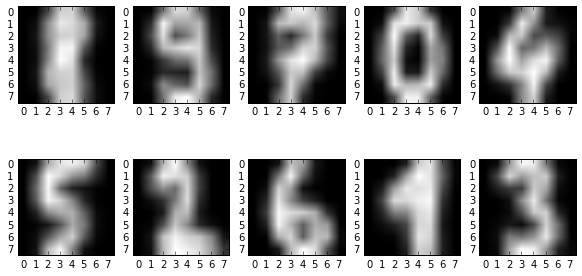

In [4]:
N_CLUSTERS = 10
clf = KMeans(n_clusters = N_CLUSTERS)
clf.fit(x_digits)
centroids = clf.cluster_centers_.reshape(10, 8, 8)
plt.figure(figsize = (10, 5))
plt.axis('off')
plt.title('Centroids')
for i in range(10):
    plt.subplot2grid((2, 5), (i / 5, i % 5))
    plt.imshow(centroids[i], cmap = 'gray')

В принципе все цифры довольно четкие кроме 8, что логично, учитывая ее форму и различные способы ее написания.

Теперь посмотрим, как меняется качество кластеризации при изменении числа признаков. Если сократить число признаков до двух, то полученные объекты можно визуализировать. Ниже функция plot_embedding делает именно это (функция взята с источника http://scikit-learn.org/stable/_downloads/plot_lle_digits.py).

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import offsetbox

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y_digits[i]),
                 color=plt.cm.Set1(y_digits[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    
    images = np.array(x_digits).reshape(x_digits.shape[0], 8, 8)
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

Для понижения размерности используем методы PCA и tSNE. Метод PCA был рассказан в предыдущем семестре. Как известно, он использует SVD-разложение матрицы объект-признак. При этом исходные признаки являются линейными комбинациями получившихся признаков. Метод tSNE вычисляет признаки таким образом, чтобы расстояние Кульбака-Лейблера между распределениями в исходном пространстве и пространстве более низкой размерности было как можно меньше. Оценим результаты кластеризации при n_clusters = 2 и 10, а также визуализируем случаи при размерности нового признакового пространства, равной 2.

PCA-2
Homogeneity score: 0.524972654569
Completeness score: 0.52881119897
Adjusted Rand index: 0.392492700772
Silhouette Coefficient: 0.393657117042



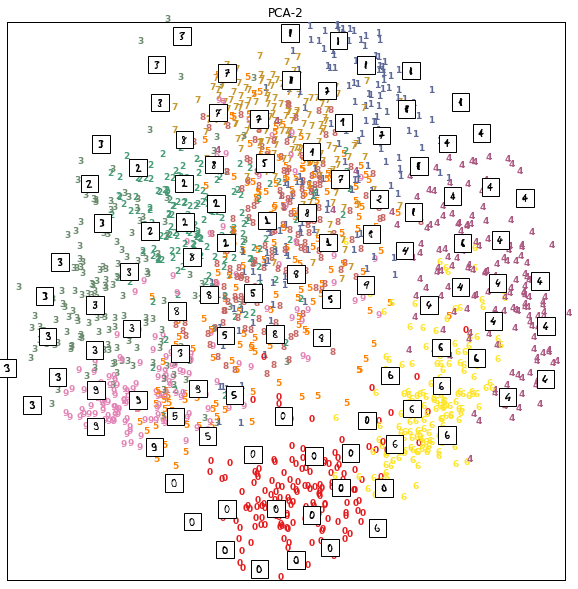

In [6]:
x_pca = PCA(n_components = 2).fit_transform(x_digits)
estimate_kmeans(KMeans(n_clusters = N_CLUSTERS), x_pca, y_digits, 'PCA-2')
plot_embedding(x_pca, 'PCA-2')

tSNE-2
Homogeneity score: 0.773416124569
Completeness score: 0.779734008606
Adjusted Rand index: 0.683372403771
Silhouette Coefficient: 0.539434415501



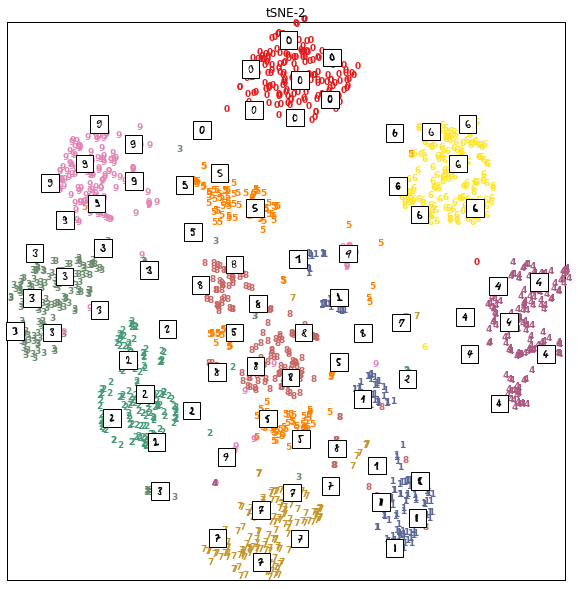

In [7]:
x_tsne = TSNE(n_components = 2, init = 'pca', random_state = 0).fit_transform(x_digits)
estimate_kmeans(KMeans(n_clusters = N_CLUSTERS), x_tsne, y_digits, 'tSNE-2')
plot_embedding(x_tsne, 'tSNE-2')

In [8]:
x_pca = PCA(n_components = 10).fit_transform(x_digits)
estimate_kmeans(KMeans(n_clusters = N_CLUSTERS), x_pca, y_digits, 'PCA-10')

x_tsne = TSNE(n_components = 10, init = 'pca', random_state = 0).fit_transform(x_digits)
estimate_kmeans(KMeans(n_clusters = N_CLUSTERS), x_tsne, y_digits, 'tSNE-10')

PCA-10
Homogeneity score: 0.722943002473
Completeness score: 0.73041698614
Adjusted Rand index: 0.651534737578
Silhouette Coefficient: 0.263704484971

tSNE-10
Homogeneity score: 0.519429317787
Completeness score: 0.683536699018
Adjusted Rand index: 0.426755752026
Silhouette Coefficient: 0.219969879174



Как можно видеть, самый лучший результат заметен при использовании метода tSNE-2. Значения всех метрик в этом случае самые высокие, а при визуальном отображении кластеры очень хорошо различимы. Причем такие цифры как 0, 4, 6 и 7 различимы практически идеально, в то время как цифры 5 и 8 несколько переплелись между собой. Метод PCA-2 дает плохой результат, так как число признаков, равное 2, слишком мало для SVD-разложения без потери информации, однако PCA-10 уже неплох (значения трех метрик практически равны метрикам в исходном признаковом пространстве, а silhoette_score даже лучше, то есть кластеры становятся более различимыми). Тем не менее, метод tSNE является довольно трудоемким и его лучше не применять на очень больших данных или при большой размерности нового признакого пространства.

Также стоит отметить, что метрики не всегда являются согласованными. Например, при PCA-2 значения homo, comp и ARI очень сильно упали, а вот silhhoette_score сильно вырос. Несмотря на приличное несоответствие истинных и полученных результатов, полученные кластеры являются хорошо отделимыми друг от друга, что само по себе неплохо.

Теперь выделим плохие объекты, то есть такие объекты, у которых истинная метка не является доминирующей в получившемся кластере (свой среди чужих, чужой среди своих), причем это характерно для всех алгоритмов с различными параметрами и методами сжатия пространства. Используем обычный k-means с init = random; PCA-10 и tSNE-2.

In [9]:
clf = KMeans(init = 'random', n_clusters = N_CLUSTERS)
clf.fit(x_digits)
y_usual = clf.labels_

x_pca = PCA(n_components = 10).fit_transform(x_digits)
clf.fit(x_digits)
y_pca = clf.labels_

x_tsne = TSNE(n_components = 2, init = 'pca', random_state = 0).fit_transform(x_digits)
clf.fit(x_digits)
y_tsne = clf.labels_

def is_good (values, index):
    digit_count = [0] * N_CLUSTERS
    for i in range(len(values)):
        if values[index] == values[i]:
            digit_count[y_digits[i]] += 1
    return digit_count[y_digits[index]] >= max(digit_count)

def good_digit(index):
    return is_good(y_usual, index) or is_good(y_pca, index) or is_good(y_tsne, index)

bad_digits = []
for i in range(len(x_digits)):
    if good_digit(i) == False:
        bad_digits.append(x_digits[i])
        
print 'The percentage of bad images: ' + str(100.0 * len(bad_digits) / len(x_digits)) + ' %'

The percentage of bad images: 14.7468002226 %


Ну, результат довольно неплох. Таких изображений меньше 15%. Что ж, давайте посмотрим, как они выглядят.

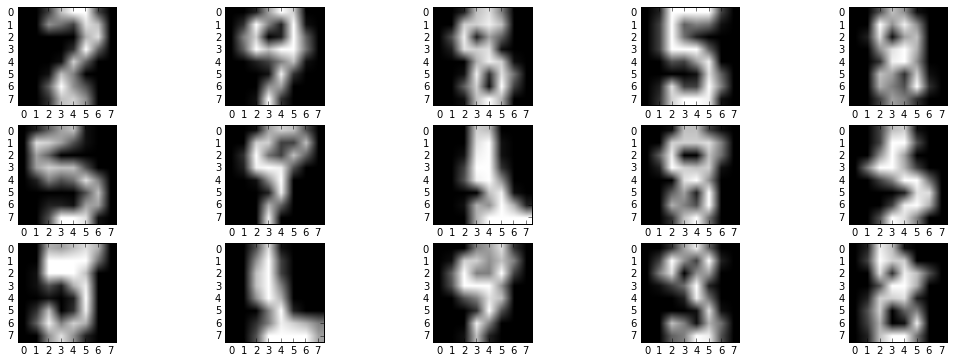

In [10]:
bad_images = np.array(bad_digits).reshape(len(bad_digits), 8, 8)
np.random.shuffle(bad_images)
plt.figure(figsize = (18, 6))
for i in range(15):
    plt.subplot2grid((3, 5), (i / 5, i % 5))
    plt.imshow(bad_images[i], cmap = 'gray')
plt.show()

Эм, интересный результат. На многих изображениях человек может различить цифры 5 и 8. Однако, k-means это может далеко не всегда. Тем более, как было показано выше, цифры 5 и 8  трудно отделимы друг от друга. Также есть отдельные примеры, которые реально трудно разобрать.

## Часть 2. Разделение изображения на семантические компоненты

В этой части лабораторной работы мы рассмотрим методы разделения изображений на однородные компоненты. Сперва загрузим тестовые изображения.

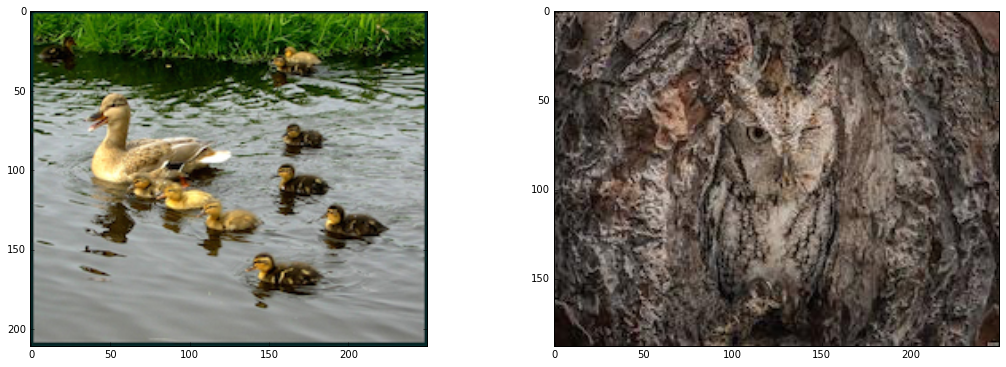

In [11]:
%matplotlib inline
import matplotlib.pylab as plt
from skimage.io import imread

ducks = imread('ducks.jpg')
owl = imread('owl.jpg')
plt.figure(figsize = (18, 6))
plt.subplot2grid((1, 2), (0, 0))
plt.imshow(ducks)
plt.subplot2grid((1, 2), (0, 1))
plt.imshow(owl)
plt.show()

Картинки очень разные. Если в первой картинке можно выделить множество составляющих "на глаз", то вторая картинка визуально выглядит почти однородной и однообразной. Итак, сегментацию изображений мы будем осуществлять двумя способами. Первый способ: K-means, второй - спектральная кластеризация.

Обычное изображение состоит из пикселей, каждый из которых характеризуется тремя числами: значения интенсивнстей r, g и b каналов, которые в совокупности дают определенный цвет. Алгоритм k-means, помимо цвета точки, также будет учитывать и ее пространственное расположение. Важность расположения в пространстве является задаваемым параметром.

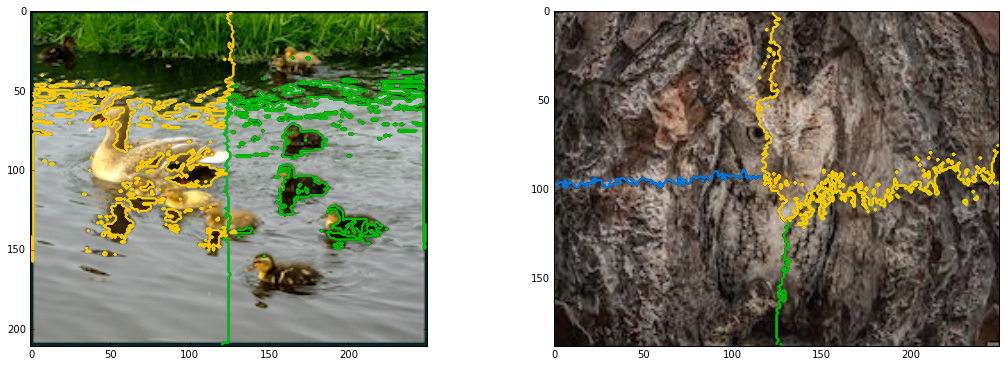

In [12]:
import numpy as np
from sklearn.cluster import KMeans

def image_kmeans (img, coef, n_regions):
    h, w = img.shape[0], img.shape[1]
    x = np.arange(h) * coef
    y = np.arange(w) * coef
    loc = np.array([[i, j] for i in x for j in y])
    rgb = np.array(img).reshape(len(loc), 3)
    new_image = np.concatenate((loc, rgb), axis = 1)
    
    clf = KMeans(n_clusters = n_regions)
    labels = clf.fit_predict(new_image).reshape((h, w))
    return labels

def show_regions(image, labels, n_regions):
    plt.imshow(image)
    for label in range(n_regions):
        plt.contour(labels == label, contours = 1,
                    colors=[plt.cm.spectral(label / float(n_regions))])

n_regions = 4
coef = 2.0
plt.figure(figsize = (18, 6))

plt.subplot2grid((1, 2), (0, 0))
labels = image_kmeans(ducks, coef, n_regions)
show_regions(ducks, labels, n_regions)

plt.subplot2grid((1, 2), (0, 1))
labels = image_kmeans(owl, coef, n_regions)
show_regions(owl, labels, n_regions)

Как можно заметить, результаты неплохие. На первой картинке некоторые объекты, заметные на фоне природы (например, утята) довольно четко выделяются. Вторая картинка оказалась слишком сложной, чтобы можно было заметить на ней сову. Также отметим, что параметр лямбда равен 2.0, что означает большую значимость пространственного расположения точек. В результате вторая картинка разделилась на 4 почти равные части.

Спектральная кластеризация является альтернативным способом сегментации изображений. Функция кластеризации взята из примера http://scikit-learn.org/0.16/_downloads/plot_lena_segmentation.py.

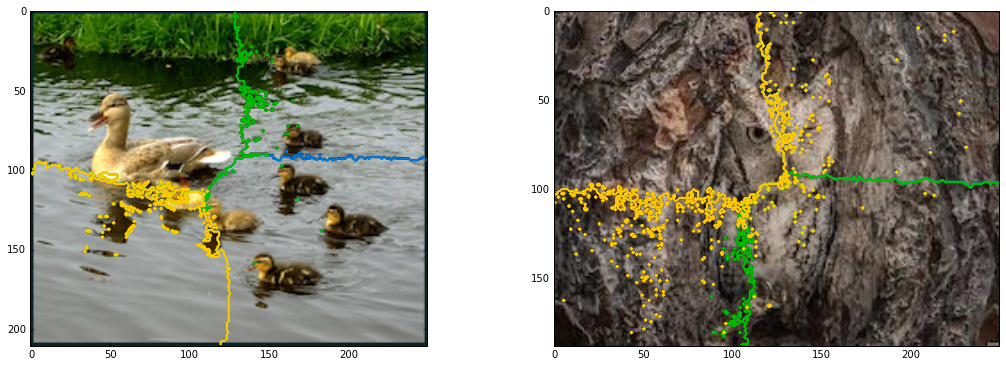

In [13]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from skimage.color import rgb2gray

def image_spectral(img, beta, eps, n_regions, assign_labels):
    img = rgb2gray(img)
    graph = image.img_to_graph(img)
    graph.data = np.exp(-beta * graph.data / img.std()) + eps
    labels = spectral_clustering(graph, n_clusters = n_regions, assign_labels = assign_labels)
    labels = labels.reshape((img.shape[0], img.shape[1]))
    return labels

n_regions = 4
plt.figure(figsize = (18, 6))

plt.subplot2grid((1, 2), (0, 0))
labels = image_spectral(ducks, 2, 1e-6, n_regions, 'kmeans')
show_regions(ducks, labels, n_regions)

plt.subplot2grid((1, 2), (0, 1))
labels = image_spectral(owl, 2, 1e-6, n_regions, 'kmeans')
show_regions(owl, labels, n_regions)

В данном примере параметр beta был выставлен довольно небольшим, что также повлекло довольно мягкое разделение области на кластеры. Данный метод является крайне ресурсоемким, поэтому перед кластеризацией изображение приводится к серому цвету. На этот раз контуры утят не выделялись, сова также гасится. Что ж, не будем унывать. Давайте всячески поизменяем параметры алгоритмов и посмотрим, к чему это приведет.

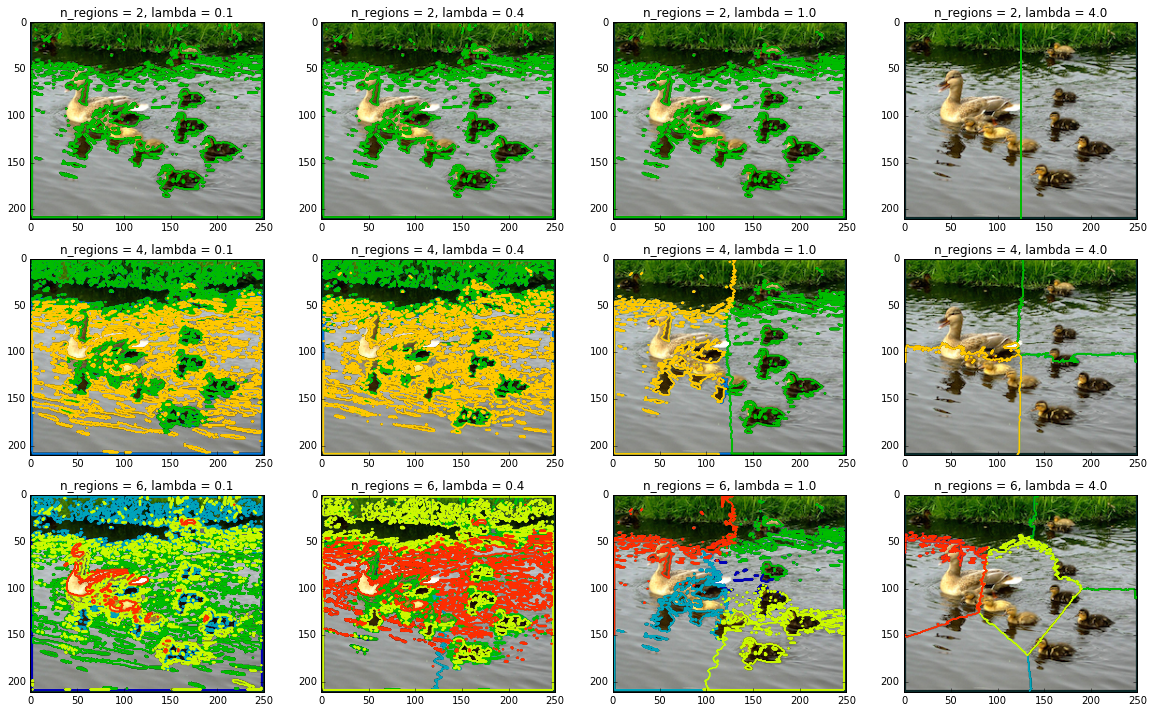

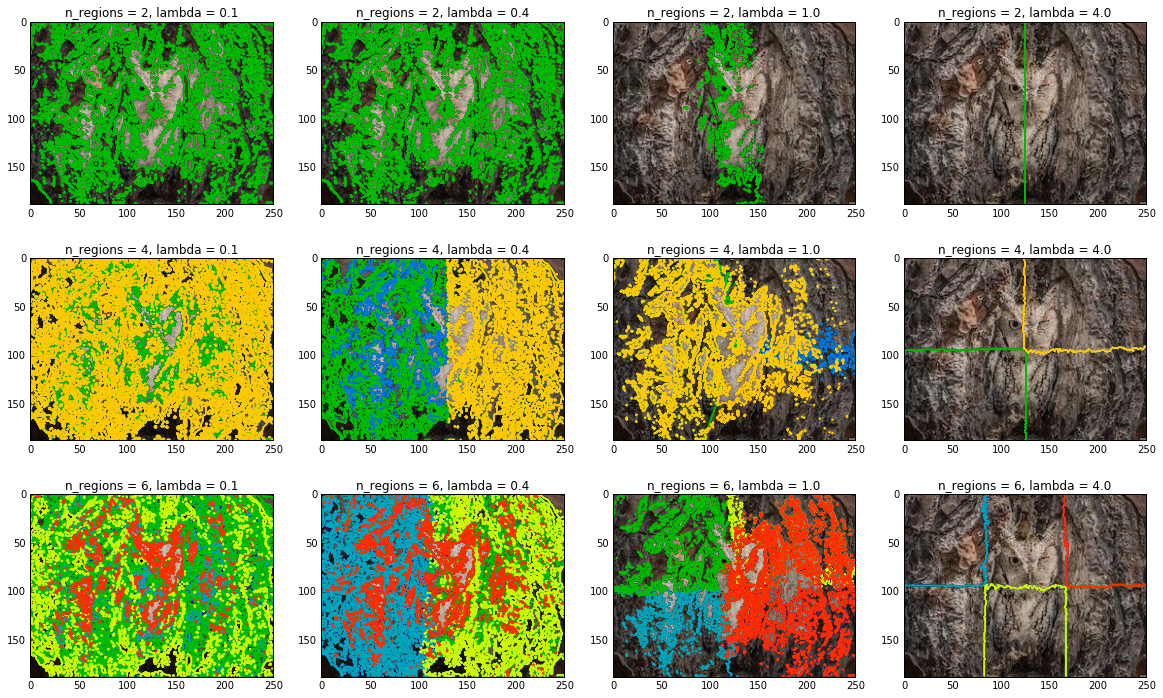

In [14]:
def show_kmeans(img):
    n_clusters = [2, 4, 6]
    coef = [0.1, 0.4, 1.0, 4.0]
    
    plt.figure(figsize = (20, 12))
    for i in range(12):
        n_regions = n_clusters[i / 4]
        lambda_ = coef[i % 4]
        plt.subplot2grid((3, 4), (i / 4, i % 4))
        labels = image_kmeans(img, lambda_, n_regions)
        show_regions(img, labels, n_regions)
        plt.title('n_regions = ' + str(n_regions) + ', lambda = ' + str(lambda_))
    plt.show()
    
show_kmeans(ducks)
show_kmeans(owl)

Итак, какие выводы можно сделать? Для начала, параметр $\lambda$ довольно важен. Если он мал по величине, разделяющие контуры имеют довольно причудливую форму, соответствующую форме объектов на изображении. При большом значении пространственное расположение играет решающую роль и изображение делится на несколько одинаковых по размеру частей.  
Что касается качества кластеризации, не все однозначно. На первой картинке утята выделяются без проблем, но вместе с тенью. А вот утка четко выделена только в одном случае. С совой все гораздо сложнее. Картинка настолько однородная, что выделить что-то очень трудно. Примерные нечеткие контуры совы также видны лишь в одном случае.  
Теперь перейдем к спектральной кластеризации.

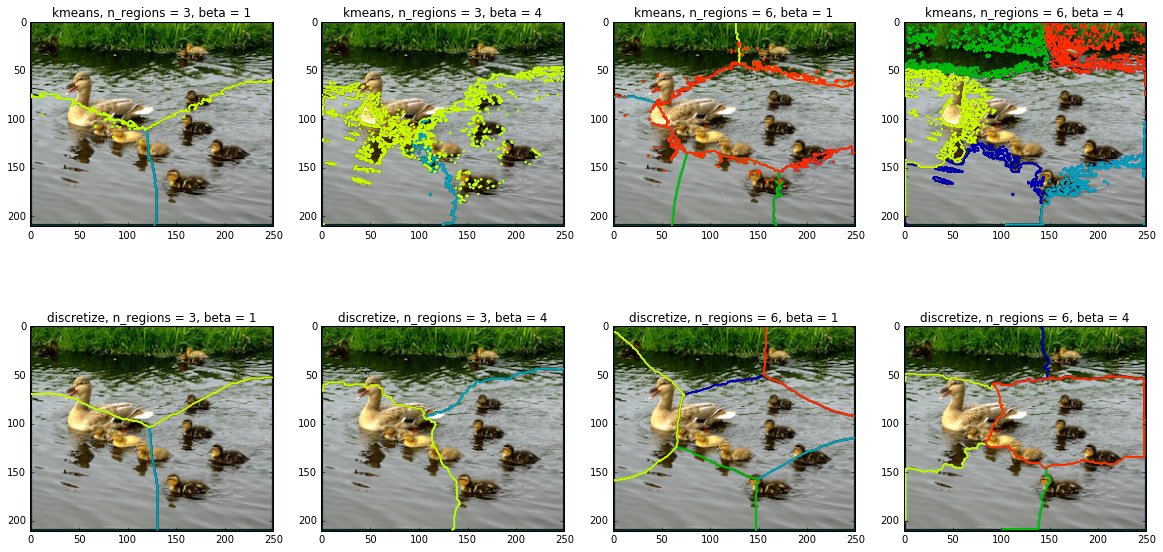

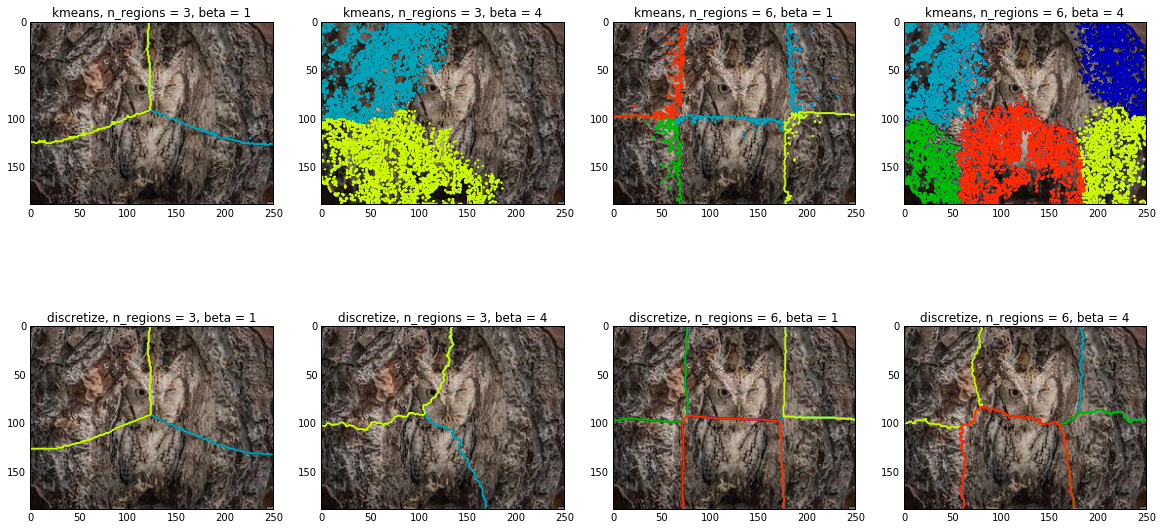

In [15]:
def show_spectral(img):
    n_clusters = [3, 6]
    betas = [1, 4]
    assign_labels = ['kmeans', 'discretize']
    
    plt.figure(figsize = (20, 10))
    for i in range(8):
        assign_label = assign_labels[i / 4]
        beta = betas[i % 2]
        n_regions = n_clusters[(i / 2) % 2]
        plt.subplot2grid((2, 4), (i / 4, i % 4))
        labels = image_spectral(img, beta, 1e-6, n_regions, assign_label)
        show_regions(img, labels, n_regions)
        plt.title(assign_label + ', n_regions = ' + str(n_regions) + ', beta = ' + str(beta))
    plt.show()

show_spectral(ducks)
show_spectral(owl)

На мой взгляд, спектральная кластеризация показала более худшие результаты, чем kmeans-кластеризация. Контуры утят были выделены всего в одном случае (не говоря уже про утку), а с совой вообще все печально, ее на таком фоне вообще невозможно выделить. К тому же спектральная кластеризация очень медленная, из-за чего пришлось приводить все изображения к серому цвету. Возможно, это и есть причина низкого качества классификации.

В заключение приведем изображения с наилучшим, на мой взгляд, качеством кластеризации.

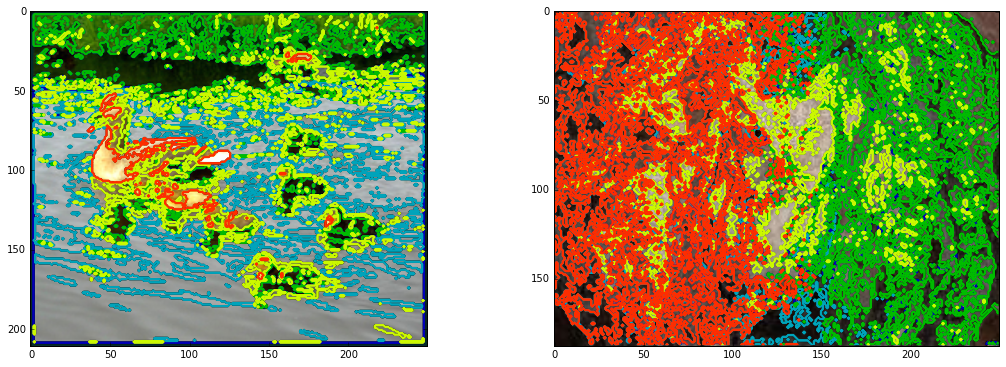

In [19]:
plt.figure(figsize = (18, 6))
plt.subplot2grid((1, 2), (0, 0))
labels = image_kmeans(ducks, 0.1, 6)
show_regions(ducks, labels, 6)
plt.imshow(ducks)
plt.subplot2grid((1, 2), (0, 1))
labels = image_kmeans(owl, 0.4, 6)
show_regions(owl, labels, 6)
plt.show()

Оба этих изображения получены с помощью метода kmeans. Таким образом, в данной работе алгоритм kmeans, помимо малого времени работы, показывает и приемлемое качество кластеризации, в отличие от своего спектрального собрата. На картинке с утками можно выделить практически все объекты, а на "сложной" картинке с совой эту сову можно выделить, пусть и в качестве части кластера.

## Часть 3. Тематическое моделирование

В данной лабораторной работе мы будем анализировать письма Хиллари Клинтон. Хочется сказать спасибо составителям задания, так как данная постановка задачи прилично повышает самооценку и позволяет ощутить себя частью чего-то важного. Мы будем использовать две тематические модели: PLSA и LDA. Для обучения модели PLSA решим задачу максимизации неполного правдоподобия с помощью ЕМ-алгоритма.

### EM-алгоритм

В данной работе приведены все формулы пересчета на Е-шаге и М-шаге, поэтому просто выполним все, что сказано в задании.  
Сперва считаем коллекцию писем.

In [1]:
import pandas as pd
import numpy as np

emails = pd.read_csv('Emails.csv')

Тексты писем содержатся в поле RawText. После представления данных в виде «мешка слов» удалим самые редкие и частые слова. Верхнюю границу было решено принять равной 425, посмотрев на частоту появления различных числовых комбинаций.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(emails.RawText)

count_words = cv_matrix.toarray()
freq = np.array([np.sum(count_words[:, i]) for i in range(count_words.shape[1])])
good = np.logical_and(freq > 10, freq < 425)
words = np.array(cv.get_feature_names())[good]
count_words = count_words[:, good]

Число слов сократилось в несколько раз. Из-за этого в некоторых документах слов не осталось вообще и для корректной работы ЕМ-алгоритма (да и вообще, зачем они нужны?) эти документы нужно удалить.

In [3]:
non_empty_docs = []
for index in range(len(count_words)):
    if np.sum(count_words[index]) > 0:
        non_empty_docs.append(index)
count_words = count_words[non_empty_docs].astype(float)

In [4]:
nwd = np.transpose(count_words)
W, D = nwd.shape
n = np.sum(nwd)

Матрица nwd содержит частоты слов и является ненормированной матрицей F. Теперь приведем реализацию ЕМ-алгоритма в соответствии с псевдокодом.

In [5]:
EPS = 1e-10

def to_distribution(matrix):
    res = np.array(matrix)
    res[res < EPS] = EPS
    for column in range(res.shape[1]):
        res[:, column] = res[:, column] / np.sum(res[:, column])
    return res

def init(T):
    fwt = to_distribution(np.random.sample((W, T)))
    qtd = to_distribution(np.random.sample((T, D)))
    return fwt, qtd

def EM_algorithm(T, max_iter):
    fwt, qtd = init(T)
    perp_values = []
    for i in range(max_iter):
        nwt = np.zeros((W, T))
        nt = np.zeros(T)
        qtd_new = np.zeros((T, D))
        perp = 0.0
        for d in range(D):
            doc = np.array(nwd[:, d])
            z = np.array([np.dot(fwt[w], qtd[:, d]) for w in range(W)])
            ptdw = np.array([fwt[:, t] * qtd[t][d] / z for t in range(T)])
            for t in range(T):
                qtd_new[t, d] = np.dot(ptdw[t], doc)
                nwt[:, t] = nwt[:, t] + ptdw[t] * doc
            nt = nt + qtd_new[:, d]
            qtd_new[:, d] = qtd_new[:, d] / np.sum(doc)
            perp = perp + np.sum(np.log(z) * doc)
        perp = np.exp(-perp / n)
        fwt = to_distribution(nwt / nt)
        qtd = to_distribution(qtd_new)
        perp_values.append(perp)
    return fwt, qtd, np.array(perp_values)

Функция to_distribution, помимо средства нормировки столбцов, также является и искусственным костылем. В ходе работы ЕМ-алгоритма некоторые значения принимают крайне малые значения (а часто и зануляются), что ведет к возникновению NaN-значений. Поэтому вместо нулевых вероятностей используются очень маленькие значения ($10^{-10}$), не влияющие на качество алгоритма.

Применим ЕМ-алгоритм при Т = 5.

In [6]:
fwt, qtd, perp = EM_algorithm(5, 25)

Для удобного отображения результатов построим график значения перплексии, а также реализуем функцию, находящую наиболее частые слова для каждой темы.

In [7]:
import sys

%matplotlib inline
import matplotlib.pylab as plt

def frequent_words(probs, theme, n_top):
    temp = zip(probs[:, theme], np.array([i for i in range(probs.shape[0])]))
    most_common = sorted(temp, reverse = True)
    prob, index = zip(*most_common)
    return np.array(index[:n_top])

def show_theme_words(fwt, n_top):
    for t in range(fwt.shape[1]):
        print 'Key words of theme ' + str(t + 1) + ': '
        keywords = words[frequent_words(fwt, t, n_top)]
        for i in range(n_top):
            sys.stdout.write(keywords[i])
            if i < n_top - 1:
                sys.stdout.write(', ')
        print
        print

def show_perplexity(perp):
    iterations = [i + 1 for i in range(len(perp))]
    plt.figure(figsize = (12, 6))
    plt.plot(iterations, perp, linewidth = 2.5)
    plt.title("Perplexity")
    plt.xlabel("Iteration")
    plt.xticks(iterations)
    plt.show()

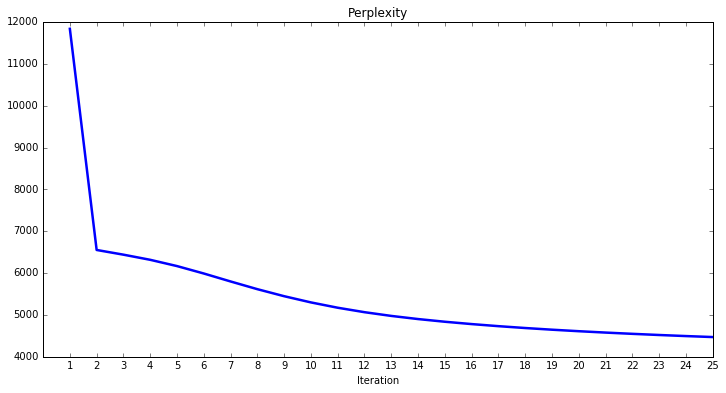

Key words of theme 1: 
keib, taliban, killed, mahogany, militias, fighting, karzai, jalil, wjc, o_shift, branch, mcchrystal, islamic, regime, nato, stated, tripoli, turkish, ntc, pdpa

Key words of theme 2: 
labour, craig, kelly, davutoglu, william, patrick, armenia, nea, tories, sbu, chris, joe, cameron, steinberg, goldman, britain, sean, berlin, afternoon, jeffrey

Key words of theme 3: 
resources, boehner, partners, capacity, humanitarian, training, goals, ensure, goal, critical, donors, ground, relief, agencies, earthquake, class, funding, initiative, families, etc

Key words of theme 4: 
energy, research, internet, spending, asia, tea, koch, policies, cabinet, society, face, movement, ellen, terrorism, billion, org, gay, jerusalem, majority, century

Key words of theme 5: 
ireland, northern, dup, residence, lissa, treaty, monica, guardian, muscatine, shaun, robinson, assembly, tony, hanley, nora, kris, toiv, floor, thru, mtg



In [8]:
show_perplexity(perp)
show_theme_words(fwt, 20)

Отлично, вроде получилось! Перплексия убывает с ростом числа итераций, а ключевые слова в принципе являются информативными. Что касается интерпретируемости тем, попробуем разобраться с результатами.  
1 тема очень хорошо интерпретируется. В ней упоминаются Талибан, военные, исламский режим, президент Афганистана Karzai, мусульманское имя Jalil, а также глаголы killed и fighting. Очевидно, что тема посвящена агрессивным последователям ислама в Средней Азии.  
2 тема менее понятная. В ней упомянуты две основные политические партии Британии (labour и tories), сама Британия, ее премьер-министр Кэмерон, а также американский дипломат Kelly Craig. Скорее всего, речь о выборах в Великобритании или каком-то другом событии, в которое эти партии вовлечены. Тем не менее, сюда вовлечены премьер-министр Турции Давутоглу, Армения и парочка влиятельных фамилий.  
Судя по словам 3 темы, речь идет о выделении гуманитарной помощи жертвам землетрясения. Главное действующее лицо здесь John Boehner – спикер палаты представителей США, а основная тема – объем требуемых ресурсов.  
4 тема малопонятная. Если ориентироваться на самые топовые слова, возможно, речь об энергетических исследованиях и Интернете в Азии. Хотя не очень понятно, как они связаны. А потом идут хэштеги популярных твитов: чай, политики, наука, лицо, терроризм, гей.  
В 5 теме самые популярные слова – Северная Ирландия и DUP – Демократическая партия Северной Ирландии. Скорее всего, речь именно об этом. Также упомянуты Lissa Muscatine – спичрайтер Хиллари Клинтон, Моника (хм, кто же это?) и телеведущая Shaun Robinson. Есть ощущение, что это две отдельные темы.  
Как итог, две темы понятны, две темы различимы лишь по самым топовым словам, а одна непонятна вообще.

Теперь построим модель при T = 10 и T = 20.

In [9]:
fwt, qtd, perp = EM_algorithm(10, 25)
show_theme_words(fwt, 20)

Key words of theme 1: 
steinberg, nora, toiv, apr, mitchell, classified, dos, feltman, min, slaughtera, class, jeffrey, william, gis, declassify, das, qddr, pat, patrick, info

Key words of theme 2: 
rice, wjc, branch, love, residence, friend, gore, mrs, intended, hill, mother, cherie, bilateral, young, whom, ms, susan, immediately, reinesp, photo

Key words of theme 3: 
mexico, labour, poll, tories, palau, kris, balderston, trafficking, expo, dialogue, mtg, tv, delegation, kurt, coverage, relief, korean, spend, base, majority

Key words of theme 4: 
lissa, muscatine, zelaya, davutoglu, armenia, monica, gay, hanley, shaun, britain, joe, honduran, dan, chronic, sir, muscatinel, ni, chilcot, drive, oas

Key words of theme 5: 
keib, muslim, islamic, mahogany, jalil, o_shift, religious, ntc, regime, fighting, belhaj, movement, stated, islamist, turkish, militias, egyptian, berlusconi, jerusalem, mubarak

Key words of theme 6: 
training, pdpa, resources, diplomats, ensure, goals, berlin, ha

In [10]:
fwt, qtd, perp = EM_algorithm(20, 25)
show_theme_words(fwt, 20)

Key words of theme 1: 
boehner, feltman, jeffrey, steinberg, class, dos, mashabane, classified, das, nea, gis, declassify, william, pa, bob, donors, ca, afternoon, sbu, apr

Key words of theme 2: 
davutoglu, armenia, mcchrystal, koch, palau, charles, shall, c05763223, tina, amy, yeah, nancy, kochs, dollars, scanlon, kaidanow, research, tea, phil, board

Key words of theme 3: 
cameron, labour, harold, treaty, tories, senators, tory, british, chronic, romney, britain, clegg, koh, ed, diseases, cuts, hongju, coalition, hague, disease

Key words of theme 4: 
civilian, diplomats, allies, cooperation, pakistani, wikileaks, missile, asia, border, range, areas, focus, weapons, ensure, society, host, terrorism, poll, threats, partners

Key words of theme 5: 
lew, pdpa, jack, pd, nora, bureau, fy, toiv, training, qddr, campbell, crowley, goals, goal, initiative, resources, african, derek, communications, cultural

Key words of theme 6: 
berlin, joe, shanghai, miguel, nora, drive, rodriguez, gate

Посмотрев на результаты, можно утверждать, что при увеличении числа тем многие темы, которые выделялись при их малом числе, теперь становятся более четкими, очерченными. Например, темы про ислам, британские партии и Северную Ирландию теперь более выраженные, однако большинство тем становятся неинтерперетируемыми. Из 20 тем в половине из них нельзя понять о чем речь. Кроме того, некоторые темы распадаются на несколько тем, которые довольно близки по контенту.

Теперь посмотрим, как инициализация влияет на результат. Возьмем самый худший случай: занулим все элементы матриц. После нормировки все элементы в кажлой матрице станут одинаковыми.

In [11]:
def init(T):
    a = to_distribution(np.zeros((W, T)))
    b = to_distribution(np.zeros((T, D)))
    return a, b

fwt, qtd, perp = EM_algorithm(5, 15)
show_theme_words(fwt, 20)

Key words of theme 1: 
jones, tom, perhaps, society, apr, guardian, wrote, majority, board, taking, love, treaty, asking, ground, along, include, regarding, large, ms, jeffrey

Key words of theme 2: 
jones, tom, perhaps, society, apr, guardian, wrote, majority, board, taking, love, treaty, asking, ground, along, include, regarding, large, ms, jeffrey

Key words of theme 3: 
jones, tom, perhaps, society, apr, guardian, wrote, majority, board, taking, love, treaty, asking, ground, along, include, regarding, large, ms, jeffrey

Key words of theme 4: 
jones, tom, perhaps, society, apr, guardian, wrote, majority, board, taking, love, treaty, asking, ground, along, include, regarding, large, ms, jeffrey

Key words of theme 5: 
jones, tom, perhaps, society, apr, guardian, wrote, majority, board, taking, love, treaty, asking, ground, along, include, regarding, large, ms, jeffrey



Ну вот и результат: алгоритм просто не различает смеси, он считает их одинаковыми. В процессе дебага и тестирования также было выявлено, что результат варьировался в зависимости от начальных рандомных приближений, но не очень сильно. Итоговое значение перплексии колебалось в районе 10-20 %, да и сходимость была разная. В итоге можно сделать вывод, что рандомная инициализация не сильно влияет на качество работы алгоритма, но, тем не менее, не стоит забывать о неустойчивости ЕМ-алгоритма и возможности попадания в локальный максимум, что дает в итоге плохой результат.

### Модель LDA

In [1]:
from gensim import matutils
from gensim.models.ldamodel import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

emails = pd.read_csv('Emails.csv')
cv = CountVectorizer()
cv_matrix = cv.fit_transform(emails.RawText)

Также как и в предыдущем пункте удалим слишком редкие слова и стоп-слов, а после этого приведем частотную матрицу обратно в сырые данные.

In [3]:
count_words = cv_matrix.toarray()
freq = np.array([np.sum(count_words[:, i]) for i in range(count_words.shape[1])])
good = np.logical_and(freq > 10, freq < 425)
vocab = np.array(cv.get_feature_names())[good]
count_words = count_words[:, good]
non_empty_docs = []
for index in range(len(count_words)):
    if np.sum(count_words[index]) > 0:
        non_empty_docs.append(index)
count_words = count_words[non_empty_docs]

def matrix_to_corp(matrix, vocab):
    result = []
    for row in range(matrix.shape[0]):
        temp = []
        for column in range(matrix.shape[1]):
            for i in range(matrix[row][column]):
                temp.append(vocab[column])
        result.append(' '.join(temp))
    return result

new_raw_data = matrix_to_corp(count_words, vocab)

Подготовим все требуемые для lda представления.

In [4]:
cv_matrix = cv.fit_transform(new_raw_data)
corp = matutils.Sparse2Corpus(cv_matrix)
vocab = cv.get_feature_names()
id_dict = dict([(i, s) for i, s in enumerate(vocab)])

Теперь обучим модель и выведем результаты.

In [5]:
import sys

def show_theme_words(T, n_top):
    for t in range(T):
        print 'Key words of theme ' + str(t + 1) + ': '
        ans_tuple = lda.show_topic(t, topn = n_top)
        for i in range(n_top):
            sys.stdout.write(ans_tuple[i][0])
            if i < n_top - 1:
                sys.stdout.write(', ')
        print
        print

lda = LdaModel(corp, num_topics = 5, passes = 100, id2word = id_dict)
show_theme_words(5, 20)

Key words of theme 1: 
colonial, 11df, 30pm, lady, bore, marion, mandate, overview, helping, overturn, inr, kill, paranoid, mccarthy, evaluating, necessary, evaluated, 187, c05762967, migration

Key words of theme 2: 
echoing, jimani, inequality, inefficient, literacy, medical, c05773013, mildred, joined, kouchener, illness, distributing, amendments, demanding, morris, moon, penalty, investors, gets, canceling

Key words of theme 3: 
enacted, enabling, break, gangs, expressions, f75e, mohammad, eyes, mohamed, extension, extended, extent, extending, exposing, modernizing, modified, exposed, extend, mogadishu, modern

Key words of theme 4: 
inr, claiming, mccarthy, enforcing, cb, 1963, leads, conquer, continuing, childbirth, emissions, emeritus, aisle, applauded, compounds, comprised, appealing, appear, decree, desired

Key words of theme 5: 
altohiway, betrayed, fade, ezra, fail, f18news, baby, babies, eric, failed, ba, adopted, categories, equivalent, departing, laughter, hrw, compass,

На мой взгляд, темы получились явно менее интерпретируемыми, чем при использовании PLSA. Также видно, что в топе некоторых тем находятся явно мусорные слова. В данном случае LDA себя не оправдывает. Хотя, учитывая размер коллекции писем, LDA все равно не дал бы существенного выигрыша в сравнении с PLSA. В общем, как и в случае преимущества k-means кластеризации над спектральной, написанный вручную EM-алгоритм показывает результаты гораздо лучше, чем реализованный LDA.

## Заключение

Обучение без учителя является большим и важным разделом машинного обучения. В данной работе были рассмотрены задачи кластеризации и разделения смесей, решаемые соответственно методом k-means и EM-алгоритмом, каждый из которых показал очень неплохие результаты. При решении задачи кластеризации понижениие размерности пространства признаков может привести к существенному приросту качества. В случае задачи разделения смесей важным параметром является число компонентов, которое мы подбираем опытным путем. Рассмотренные нами методы показали результаты лучше, чем встроенные в библиотеки методы, такие как спектральная кластеризация и обучение LDA-модели, что открывает множество путей улучшения существующих реализаций.